In [1]:
import essentia.standard
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
def read_melody_files(filename):
    with open(filename) as f:
        _notes = f.read()

    _notes = _notes.split(',')
    return [float(i) for i in _notes]

In [12]:
def align(hum, song):
    loader = essentia.standard.EqloudLoader(filename='hummings/' + hum, sampleRate=44100)
    audio = loader()
    pitch_extractor = essentia.standard.PredominantPitchMelodia(frameSize=2048, hopSize=128)
    pitch_values, pitch_confidence = pitch_extractor(audio)
    pitch_values_db = read_melody_files('strings/' + song + '.txt')
    alignment = dtw(pitch_values, pitch_values_db, step_pattern=rabinerJuangStepPattern(6, "c"), keep_internals=True, open_begin=True, open_end=True)
    return alignment

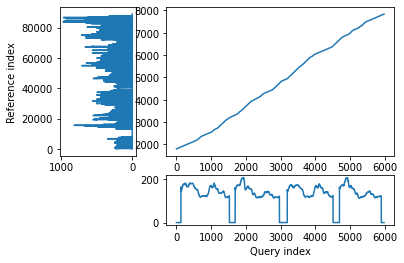

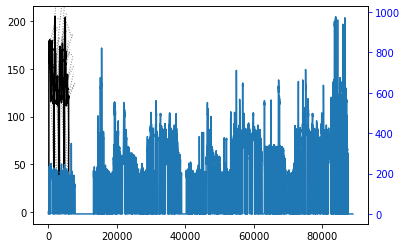

<AxesSubplot:>

In [13]:
alignment = align('Adele - Rolling In The Deep.wav', 'counting_stars')
alignment.plot(type="threeway")
alignment.plot(type="twoway",offset=-2)

In [14]:
alignment.distance

240666.5832731432

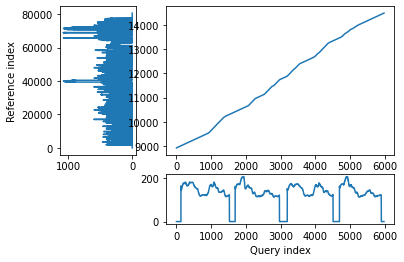

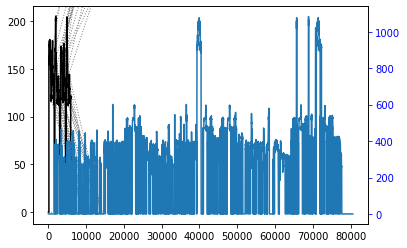

<AxesSubplot:>

In [15]:
alignment = align('Adele - Rolling In The Deep.wav', 'rolling_in_the_deep')
alignment.plot(type="threeway")
alignment.plot(type="twoway",offset=-2)

In [16]:
alignment.distance

741147.530118846